
# Proyecto de optimización

## Roger Fuentes Rodríguez C312

### Función Rana

$ f_{102}(x) = \sum_{i=0}^{D-2} (x_{i+1} + 1)\cos(t_2)\sin(t_1) + x_i \cos(t_1)\sin(t_2) $

sujeto a $ -500 \leq x_i \leq 500 $, donde:

$ t_1 = \sqrt{|x_{i+1} + x_i + 1|} $

$t_2 = \sqrt{|x_{i+1} - x_i + 1|}$


### Características

- **Continua**: La función es continua en todo su dominio.
- **Diferenciable**: Es diferenciable, lo que permite el uso de métodos basados en gradiente para su optimización.
- **No separable**: No se puede descomponer en funciones de una sola variable.
- **Escalable**: La función puede aplicarse en dimensiones mayores.
- **Multimodal**: Posee múltiples mínimos locales.

#### Referencia

- **Fuentes**: 

-K. V. Price, R. M. Storn, J. A. Lampinen, “Differential Evolution: A Practical Approach to Global Optimization,” Springer, 2005.

-https://www.researchgate.net/publication/269002299_The_grouping_differential_evolution_algorithm_for_multi-dimensional_optimization_problems


In [2]:
import numpy as np

def rana_function(x: np.ndarray) -> float:
    """
    Calcula el valor de la función rana_function para un vector dado x.

    Args:
        x (np.ndarray): Vector de dimensión D.

    Returns:
        float: Valor de la función rana_function evaluada en x.
    """
    D = len(x)
    total = 0.0
    for i in range(D - 1):
        xi = x[i]
        xi_plus_1 = x[i + 1]
        t1 = np.sqrt(np.abs(xi_plus_1 + xi + 1))
        t2 = np.sqrt(np.abs(xi_plus_1 - xi + 1))
        term1 = (xi_plus_1 + 1) * np.cos(t2) * np.sin(t1)
        term2 = xi * np.cos(t1) * np.sin(t2)
        total += term1 + term2
    return total


Entre una serie de métodos de optimización global propuestos durante los últimos veinte años, se dice que el algoritmo de **Evolución Diferencial (DE)** es uno de los más prometedores, aunque probablemente no el más popular. La ED es un algoritmo puramente heurístico basado en poblaciones, que se ha aplicado con éxito a una amplia gama de funciones de prueba y problemas del mundo real. La idea exitosa de ED consiste en evolucionar iterativamente una población de individuos en el espacio de búsqueda hasta las proximidades de la solución óptima global $x^*$, de acuerdo con una heurística predefinida que se basa en sumar las diferencias ponderadas de dos vectores poblacionales a un tercer vector. Aunque la ED básica es exitosa en muchos casos simples de baja dimensionalidad, generalmente se requiere un tiempo de computación bastante grande para problemas multimodales con mayor dimensionalidad (como la función que nos ocupa, la función Rana), y la tasa de éxito promedio disminuye significativamente para tales casos. 

En el algoritmo DE se utiliza una sola estrategia, mientras que en el algoritmo MS (se verá más adelante) se aplican tres estrategias diferentes relacionadas con el cruce y la mutación con una probabilidad predefinida. En el caso del algoritmo GMS propuesto, la población se divide en cuatro grupos diferentes, tres de los cuales en principio trabajan de forma mutuamente independiente utilizando las mismas estrategias que en los MS. Los métodos de intercambio de información entre grupos que proponemos mejoran significativamente el rendimiento del enfoque GMS en comparación con los algoritmos básicos de DE y MS. 


### Algoritmo de evolución diferencial (DE) 

Estrategia 1 El algoritmo DE propuesto por Storn y Price (1995) es un método estocástico basado en la población. Para encontrar la solución óptima $x^*$ en el espacio M-dimensional, el DE inicializa una población P con K individuos (vectores). Los límites de los parámetros asumidos definen el dominio, del cual los individuos se eligen aleatoriamente mediante una distribución uniforme en el espacio de búsqueda. El algoritmo mantiene una población con K individuos en cada generación. Storn y Price sugirieron K = 10*M como valor predeterminado. En cada iteración, para cada $X_{i}$ individual (i = 1, ... , K), se eligen aleatoriamente otros tres vectores distintos $X_{a}$ , $X_{b}$ y $X_{c}$ de la población P. Luego, se genera un nuevo vector $U_{i}$ agregando la diferencia ponderada entre dos vectores aleatorios a un tercer vector, esta operación se llama mutación. El vector mutado $U_{i}$ y el vector objetivo (inicial) $X_{i}$ forman dos padres. Con el fin de formar el vector de prueba (descendencia) $Y_{i}$ se realiza el cruce entre $U_{i}$ y $X_{i}$. 

Si $f(Yi) \leq f(Xi)$, entonces $Y_{i}$ reemplaza a $X_{i}$: esta operación se llama selección. El valor del parámetro del algoritmo Cr depende del problema pero se sugiere que el valor de Cr = 0,5 suele ser una opción razonable. El proceso de evolución anterior se repite hasta que se cumplan las condiciones de terminación.Todo el algoritmo finaliza cuando se cumple uno de los criterios de detención definidos por el usuario. El criterio de detención utilizado en este documento se basa en la mejora de la función objetivo durante el número predefinido de iteraciones PNI:

$FBEST_{pni} - FBEST < c$ donde $FBEST$ denota el mejor valor de la función objetivo en la iteración actual, $FBEST_{pni}$ es el mejor valor de la función objetivo obtenido PNI iteraciones anteriores, y c define el valor umbral de la mejora mínima requerida.


In [2]:
import numpy as np
from rana_function import rana_function
from DE import DifferentialEvolution

# Definir parámetros
dimension = 30  
bounds = [(-500, 500) for _ in range(dimension)]
population_size = 10 * dimension  # K = 10 * M
mutation_factor = 0.5  # F = 0.5
crossover_probability = 0.5  # Cr = 0.5
max_iterations = 10000
pni = 100  # Número de iteraciones para evaluar mejora
epsilon = 1e-4  # Umbral de mejora mínima requerida

# Inicializar y ejecutar el optimizador
de_optimizer = DifferentialEvolution(
    func=rana_function,
    bounds=bounds,
    population_size=population_size,
    mutation_factor=mutation_factor,
    crossover_probability=crossover_probability,
    max_iterations=max_iterations,
    pni=pni,
    epsilon=epsilon,
    seed=42  # Semilla para reproducibilidad
)

best_solution, best_value = de_optimizer.optimize()

# Resultados
print(f"Mejor solución : {best_solution}")
print(f"Mejor evaluación de la función objetivo: {best_value}")


Criterio de parada alcanzado en la iteración 1100: mejora 3.354948239575606e-05 menor que epsilon 0.0001
Mejor solución : [ 500.         -498.41057626 -497.59979894 -496.68528183 -500.
 -498.69280371 -497.25799242 -500.         -500.         -499.09668526
 -498.09154833 -496.97262389 -500.         -500.         -500.
 -500.         -497.65381568 -500.         -500.         -499.09664395
 -498.09150004 -496.97261207 -500.         -500.         -499.09667242
 -498.09154791 -496.97269906 -500.         -500.         -499.05317242]
Mejor evaluación de la función objetivo: -14137.761633092992


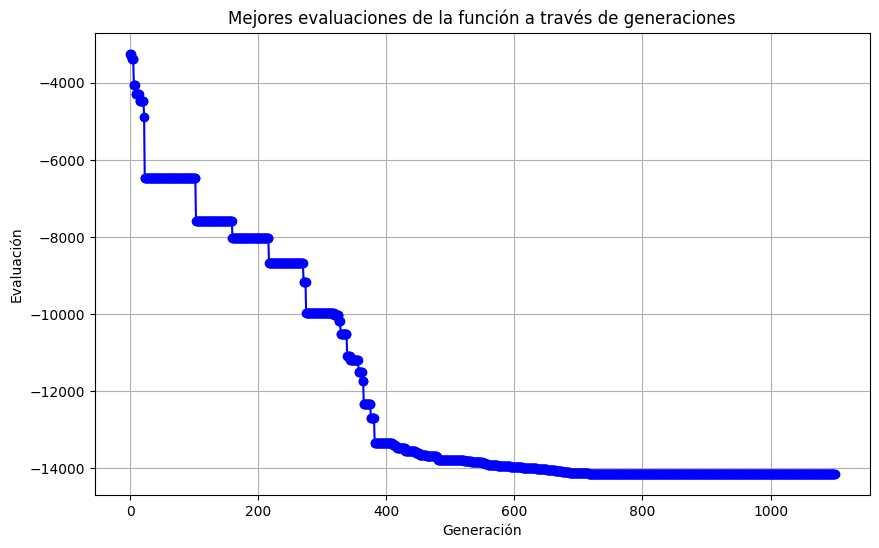

In [3]:
import matplotlib.pyplot as plt

fitness_values = de_optimizer.history

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(fitness_values, marker='o', linestyle='-', color='b')

# Configurar etiquetas y título
plt.title('Mejores evaluaciones de la función a través de generaciones')
plt.xlabel('Generación')
plt.ylabel('Evaluación')
plt.grid(True)

# Mostrar el gráfico en el notebook
plt.show()


### Algoritmo de evolución diferencial multiestrategia (MS) 
En el algoritmo de Evolución Diferencial Multi-Estrategia propuesto, para cualquier vector $X_{i}$ de la población P, se elige una de las tres estrategias seleccionadas de acuerdo con la probabilidad predefinida. Se recomiendan las siguientes estrategias: la Estrategia 1 utilizada en la ED básica, el Crossover Exponencial y el método Either-Or modificado (Mishra, 2006). La técnica de EM mejora significativamente la tasa de éxito de encontrar la solución óptima global. 
Estrategia 2. Cruce exponencial. La mutación en la estrategia de cruce exponencial se realiza de la misma manera que en la estrategia 1, determinando el vector Ui. Para crear una descendencia, el cruce se modifica de la siguiente manera. Se selecciona aleatoriamente un valor de índice j rand de [1, M], y el parámetro correspondiente $u_{i}$ se copia del mutante $U_{i}$ al padre $X_{i}$, de modo que el vector de prueba (descendencia) $Y_{i}$ será diferente del vector padre $X_{i}$. Luego, se determina la fuente de los elementos subsiguientes del vector de prueba comparando Cr con un número aleatorio uniformemente distribuido rand(0,1) que se genera de nuevo para cada índice j. Mientras $rand(0,1) \leq Cr$, los parámetros se siguen tomando del vector mutante $U_{i}$, pero dado que por primera vez $rand(0,1) > Cr$, los parámetros actuales y todos los demás se toman del vector objetivo $X_{i}$ .El método con $Cr = 0.5$ tiende a retener la mayoría de los elementos del vector padre $X_{i}$ .Por lo tanto,  cuando se usa solo, el cruce exponencial rara vez conduce a la búsqueda exitosa de un óptimo global. Sin embargo, cuando se aplica junto con otras estrategias, resulta ser una parte importante del algoritmo. Facilita la optimización de diferentes funciones, como las separables, y puede mejorar el rendimiento del algoritmo cerca del óptimo para muchos problemas. 
Estrategia 3. Estrategia modificada de uno u otro. A diferencia del cruce exponencial, la estrategia de uno u otro modificada no prefiere copiar elementos del vector padre $X_{i}$ a la descendencia $Y_{i}$. Para crear la descendencia $Y_{i}$ para cualquier vector objetivo, se crean dos vectores adicionales: el primero por mutación, $U_{i}$, y el segundo por recombinación, $W_{i}$, con el uso de un número aleatorio de la distribución normal. Luego, para cada j-ésimo componente, se genera un número aleatorio rand(0,1) y se compara con Cr. Si $rand(0,1) \leq Cr$, el parámetro de descendencia se copia del vector mutante $U_{i}$; de lo contrario, el parámetro se copia del vector recombinado $W_{i}$.

In [5]:
from MS import MultiStrategyDE
# Definir parámetros
dimension = 50  
bounds = [(-500, 500) for _ in range(dimension)]
population_size = 10 * dimension  # K = 10 * M
mutation_factor = 0.5  # F = 0.5
crossover_probability = 0.5  # Cr = 0.5
max_iterations = 10000
pni = 100  # Número de iteraciones para evaluar mejora
epsilon = 1e-4  # Umbral de mejora mínima requerida

# Inicializar y ejecutar el optimizador
ms_de_optimizer = MultiStrategyDE(
    func=rana_function,
    bounds=bounds,
    population_size=population_size,
    mutation_factor=mutation_factor,
    crossover_probability=crossover_probability,
    max_iterations=max_iterations,
    pni=pni,
    epsilon=epsilon,
    strategy_probs=[1/3, 1/3, 1/3],  # Probabilidades para seleccionar cada estrategia
    seed=42  # Semilla para reproducibilidad
)

best_solution, best_value = ms_de_optimizer.optimize()

# Resultados
print(f"Mejor solución encontrada: {best_solution}")
print(f"Valor de la función objetivo: {best_value}")


Criterio de parada alcanzado en la iteración 600: mejora 2.276447048643604e-07 menor que epsilon 0.0001
Mejor solución encontrada: [-498.13626633 -496.99636037 -500.         -500.         -500.
 -500.          440.9075473  -123.75879457 -500.         -500.
 -107.98782045 -125.35953106 -404.04640351 -500.          -77.2637829
  269.41976118  111.60582951 -500.         -500.         -402.09390085
 -500.         -500.         -145.01805948 -210.66880142 -402.34421979
 -500.          197.58112608  208.64265734 -142.21525523 -500.
 -385.46059334 -500.         -500.          -95.88964378 -500.
 -500.         -500.         -500.          500.         -307.16858915
  500.          -59.8939514  -381.10464863  338.58839531 -349.70339093
    0.          100.45417087  363.73929582 -112.02796522 -500.        ]
Valor de la función objetivo: -9860.40430860356


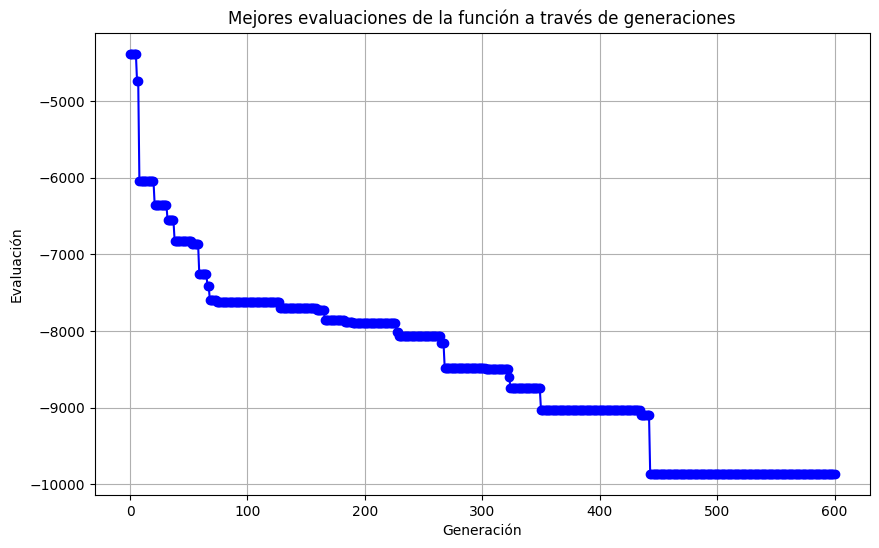

In [6]:
import matplotlib.pyplot as plt

fitness_values = ms_de_optimizer.history

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(fitness_values, marker='o', linestyle='-', color='b')

# Configurar etiquetas y título
plt.title('Mejores evaluaciones de la función a través de generaciones')
plt.xlabel('Generación')
plt.ylabel('Evaluación')
plt.grid(True)

# Mostrar el gráfico en el notebook
plt.show()


### Evolución Diferencial Multiestrategia Agrupada (GMS) 
El objetivo principal es hacer que el algoritmo de optimización sea menos vulnerable a quedar atrapado en un mínimo local. La idea básica es explotar la información sobre la ubicación de los mínimos locales en el espacio de búsqueda con el fin de encontrar un mínimo aún mejor, ojalá el global. Con el fin de encontrar varios óptimos locales diferentes, la población P se divide en cuatro grupos separados. Todos los grupos tienen aproximadamente el mismo número de elementos, lo suficientemente grandes como para permitir una búsqueda razonable por medio de la técnica DE, pero cuatro veces más pequeños que P. Cada individuo de P pertenece a un solo grupo. Si el problema pertenece a la clase de los llamados "desagradables"(nasty), se espera que cuatro grupos queden atrapados en diferentes óptimos locales. El algoritmo GMS intenta reemplazar a cada individuo en cada grupo por medio de las tres estrategias descritas anteriormente, como en la EM. Los tres primeros grupos trabajan por separado durante la mayoría de las iteraciones, mientras que el cuarto grupo tiene acceso a toda la información disponible almacenada por los individuos de la población P. Si se cumplen las condiciones predefinidas, se puede permitir que uno de los tres primeros grupos obtenga información de otros grupos. Además, en situaciones particulares, el mejor individuo del grupo puede estar "congelado" en el espacio de búsqueda. Los criterios de detención se adoptan para evitar el cese prematuro del algoritmo antes de intercambiar toda la información obtenida entre los grupos.

In [1]:
from GMS import GroupedMultiStrategyDE
from rana_function import rana_function

# Definir parámetros
dimension = 50  
bounds = [(-500, 500) for _ in range(dimension)]
population_size = 10 * dimension  # K puede ser más grande en GMS
mutation_factor = 0.5  # F = 0.5
crossover_probability = 0.5  # Cr = 0.5
max_iterations = 1000
pni = 500  # Número de iteraciones para evaluar mejora
epsilon = 1e-4  # Umbral de mejora mínima requerida

# Inicializar y ejecutar el optimizador
gms_optimizer = GroupedMultiStrategyDE(
    func=rana_function,
    bounds=bounds,
    population_size=population_size,
    mutation_factor=mutation_factor,
    crossover_probability=crossover_probability,
    max_iterations=max_iterations,
    pni=pni,
    epsilon=epsilon,
    num_groups=4,
    strategy_probs=[1/3, 1/3, 1/3],
    seed=42  # Semilla para reproducibilidad
)

best_solution, best_value = gms_optimizer.optimize()

# Resultados
print(f"Mejor solución encontrada: {best_solution}")
print(f"Valor de la función objetivo: {best_value}")


Mejor solución encontrada: [-498.13626629 -496.99636027 -500.         -497.65582618 -500.
 -500.         -498.2760218  -500.         -500.         -500.
 -500.         -500.         -500.         -500.         -500.
 -500.          -20.96659235  244.93498971 -295.63849819  190.31220556
  500.         -500.         -498.83181493 -500.         -338.86495784
  500.          500.         -234.72818295  236.03488921  217.25378444
 -500.           58.63870197  500.         -500.         -500.
 -422.92005386 -139.32894578 -500.          -62.000657   -500.
 -500.         -438.56694458  500.            6.73396651   76.71154381
 -500.         -500.         -500.         -500.         -500.        ]
Valor de la función objetivo: -12083.554673577006


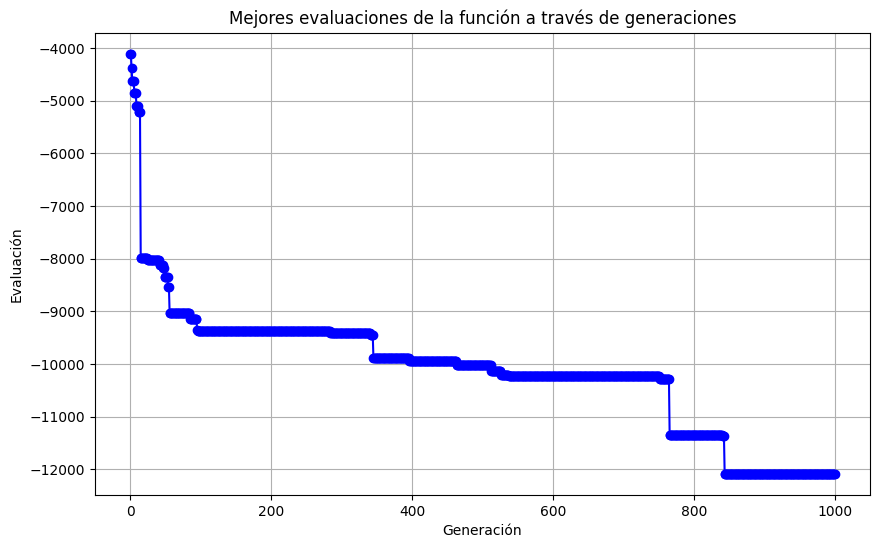

In [2]:
import matplotlib.pyplot as plt

fitness_values = gms_optimizer.history

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(fitness_values, marker='o', linestyle='-', color='b')

# Configurar etiquetas y título
plt.title('Mejores evaluaciones de la función a través de generaciones')
plt.xlabel('Generación')
plt.ylabel('Evaluación')
plt.grid(True)

# Mostrar el gráfico en el notebook
plt.show()

### Comparación entre los Métodos de Optimización

En la presente sección, se compara el rendimiento del método GMS propuesto con el de los algoritmos MS y DE .
En el presente trabajo se adoptaron los siguientes valores de parámetros: PNI = 500, F = 0,5, CR = 0,5 , E: = 10-4. Cada estrategia (1, 2 o 3) puede ser seleccionada con la misma probabilidad (1/3). Debido a que la partición de la población en cuatro grupos disminuye el número de individuos que pueden comunicarse entre sí durante la optimización, se estudió en detalle el impacto del número de individuos K en la población P. Se consideraron las versiones de 10, 30, 50 y 100 dimensiones para la función. 
Ninguno de los algoritmos fue capaz de determinar el óptimo global para la función Rana. El mejor algoritmo GMS fue capaz de encontrar el óptimo global de la función Rana para versiones de 6 dimensiones, DE para 5 dimensiones y MS solo para versiones de 4 dimensiones.Las pruebas con diferentes K mostraron que, en general, para problemas n dimensionales, el aumento de K solo aumenta el tiempo computacional, sin mejorar el rendimiento del algoritmo en particular. La diferencia entre el rendimiento de los tres algoritmos considerados es más evidente para las versiones de 30 y 50 dimensiones. El DE fue superado tanto por MS como por GMS con mayor frecuencia que en el caso 10-dimensional. GMS con 1000 individuos supera a la versión con 500 individuos para la función Rana de 50 dimensiones. Para problemas de 100 dimensiones, GMS funciona mucho mejor que los otros algoritmos. 

### Conclusión

El algoritmo GMS no acelera claramente el proceso de optimización en comparación con el método básico de DE. Sin embargo, busca mucho mejor en el espacio de las soluciones admisibles y, a costa de tiempo computacional, logra una tasa de éxito mucho mejor. Cuando tanto MS como GMS son capaces de encontrar óptimos globales, por lo general necesitan un tiempo de cálculo similar.